In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_col
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
import requests

In [32]:
# gather bulls spending data from spotrac
cap_df = pd.read_csv('bulls_2022_cap_data.csv')
cap_df = cap_df.iloc[1:]
cap_df

,PLAYER,POSITION,BASE_SALARY,CAP_FIGURE,CAP%_TEAM,CAP%_LEAGUE,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
1,DeMar DeRozan,SG,26000000.0,26000000.0,19.10,23.13,NaN,NaN,NaN,NaN
2,Nikola Vucevic,C,24000000.0,24000000.0,17.63,21.35,NaN,NaN,NaN,NaN
3,Zach LaVine,SG,19500000.0,19500000.0,14.33,17.35,NaN,NaN,NaN,NaN
4,Lonzo Ball,PG,18604651.0,18604651.0,13.67,16.55,NaN,NaN,NaN,NaN
5,Derrick Jones Jr.,SF,9720900.0,9720900.0,7.14,8.65,NaN,NaN,NaN,NaN
6,Alex Caruso,SG,8600000.0,8600000.0,6.32,7.65,NaN,NaN,NaN,NaN
7,Patrick Williams,SF,7422000.0,7422000.0,5.45,6.60,NaN,NaN,NaN,NaN
8,Coby White,PG,5837760.0,5837760.0,4.29,5.19,NaN,NaN,NaN,NaN
9,Troy Brown Jr.,SF,5170564.0,5170564.0,3.80,4.60,NaN,NaN,NaN,NaN
10,Tony Bradley,C,1789256.0,1789256.0,1.31,1.59,NaN,NaN,NaN,NaN


In [33]:
cap_df = cap_df.dropna(axis='columns')
cap_df

,PLAYER,POSITION,BASE_SALARY,CAP_FIGURE,CAP%_TEAM,CAP%_LEAGUE
1,DeMar DeRozan,SG,26000000.0,26000000.0,19.10,23.13
2,Nikola Vucevic,C,24000000.0,24000000.0,17.63,21.35
3,Zach LaVine,SG,19500000.0,19500000.0,14.33,17.35
4,Lonzo Ball,PG,18604651.0,18604651.0,13.67,16.55
5,Derrick Jones Jr.,SF,9720900.0,9720900.0,7.14,8.65
6,Alex Caruso,SG,8600000.0,8600000.0,6.32,7.65
7,Patrick Williams,SF,7422000.0,7422000.0,5.45,6.60
8,Coby White,PG,5837760.0,5837760.0,4.29,5.19
9,Troy Brown Jr.,SF,5170564.0,5170564.0,3.80,4.60
10,Tony Bradley,C,1789256.0,1789256.0,1.31,1.59


In [34]:
bulls22_spend = cap_df['BASE_SALARY'].sum()
bulls22_spend

132834003.0

In [35]:
# gather NBA total spend and winning data - 2022

nba_cap_df = pd.read_csv('nba_2018_2022_cap_data.csv', index_col=0)
nba_cap_df.drop(columns=nba_cap_df.columns[-1],
                axis=1,
                inplace=True)
nba_cap_df = nba_cap_df.iloc[:-1]
nba_cap_df

,SEASON_SPEND_RANK,TEAM,TEAM_ABV,CONFERENCE,DIVISION,WIN%,SIGNED,AVG_AGE,ACTIVE_CAP,ACTIVE_CAP_TOP3,DEAD_CAP,TOTAL_CAP,CAP_SPACE,Unnamed: 14,Unnamed: 15
SEASON,,,,,,,,,,,,,,,
2021-2022,1,Golden State Warriors,GSW,Western,Pacific,0.646,15,27.4,"$175,192,325","$115,341,076","$666,667","$184,024,769",-71610769,NaN,NaN
2021-2022,2,Brooklyn Nets,BKN,Eastern,Atlantic,0.537,15,28.0,"$157,843,675","$110,351,536","$11,438,379","$172,820,410",-60406410,NaN,NaN
2021-2022,3,Los Angeles Clippers,LAC,Western,Pacific,0.512,15,27.2,"$164,493,220","$94,317,707","$1,669,178","$166,162,398",-53748398,NaN,NaN
2021-2022,4,Minnesota Timberwolves,MIN,Western,Northwest,0.561,15,24.7,"$136,155,208","$76,156,064",-,"$165,734,220",-53320220,NaN,NaN
2021-2022,5,Los Angeles Lakers,LAL,Western,Pacific,0.402,15,29.6,"$147,504,083","$120,753,050","$8,338,356","$160,861,720",-48447720,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-2018,25,Philadelphia 76ers,PHI,Eastern,Atlantic,0.634,15,25.4,"$89,638,648","$50,698,103","$10,225,000","$100,020,936",-927936,NaN,NaN
2017-2018,26,Orlando Magic,ORL,Eastern,Southeast,0.305,15,25.7,"$94,946,559","$46,250,000","$333,334","$95,538,311",3554689,NaN,NaN
2017-2018,27,Indiana Pacers,IND,Eastern,Central,0.585,15,25.5,"$90,081,320","$46,296,348","$3,534,569","$93,661,969",5431031,NaN,NaN


In [36]:
# clean dataframe to remove dollar signs and create new column
#nba22_spend_rank = nba_cap_df.sort_values(by='SEASON_SPEND_RANK',ascending=True)
nba_cap_df['TOTAL_CAP'] = nba_cap_df['TOTAL_CAP'].replace("[$,]", "", regex=True).astype(int)
nba_cap_df['ACTIVE_CAP'] = nba_cap_df['ACTIVE_CAP'].replace("[$,]", "", regex=True).astype(int)
nba_cap_df['ACTIVE_CAP_TOP3'] = nba_cap_df['ACTIVE_CAP_TOP3'].replace("[$,]", "", regex=True).astype(int)
nba_cap_df['TOTAL_CAP_MILLIONS'] = nba_cap_df['TOTAL_CAP']/1000000
nba_cap_df['TOTAL_CAP_MILLIONS'] = nba_cap_df['TOTAL_CAP_MILLIONS'].round(2)
nba_cap_df

,SEASON_SPEND_RANK,TEAM,TEAM_ABV,CONFERENCE,DIVISION,WIN%,SIGNED,AVG_AGE,ACTIVE_CAP,ACTIVE_CAP_TOP3,DEAD_CAP,TOTAL_CAP,CAP_SPACE,Unnamed: 14,Unnamed: 15,TOTAL_CAP_MILLIONS
SEASON,,,,,,,,,,,,,,,,
2021-2022,1,Golden State Warriors,GSW,Western,Pacific,0.646,15,27.4,175192325,115341076,"$666,667",184024769,-71610769,NaN,NaN,184.02
2021-2022,2,Brooklyn Nets,BKN,Eastern,Atlantic,0.537,15,28.0,157843675,110351536,"$11,438,379",172820410,-60406410,NaN,NaN,172.82
2021-2022,3,Los Angeles Clippers,LAC,Western,Pacific,0.512,15,27.2,164493220,94317707,"$1,669,178",166162398,-53748398,NaN,NaN,166.16
2021-2022,4,Minnesota Timberwolves,MIN,Western,Northwest,0.561,15,24.7,136155208,76156064,-,165734220,-53320220,NaN,NaN,165.73
2021-2022,5,Los Angeles Lakers,LAL,Western,Pacific,0.402,15,29.6,147504083,120753050,"$8,338,356",160861720,-48447720,NaN,NaN,160.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-2018,25,Philadelphia 76ers,PHI,Eastern,Atlantic,0.634,15,25.4,89638648,50698103,"$10,225,000",100020936,-927936,NaN,NaN,100.02
2017-2018,26,Orlando Magic,ORL,Eastern,Southeast,0.305,15,25.7,94946559,46250000,"$333,334",95538311,3554689,NaN,NaN,95.54
2017-2018,27,Indiana Pacers,IND,Eastern,Central,0.585,15,25.5,90081320,46296348,"$3,534,569",93661969,5431031,NaN,NaN,93.66


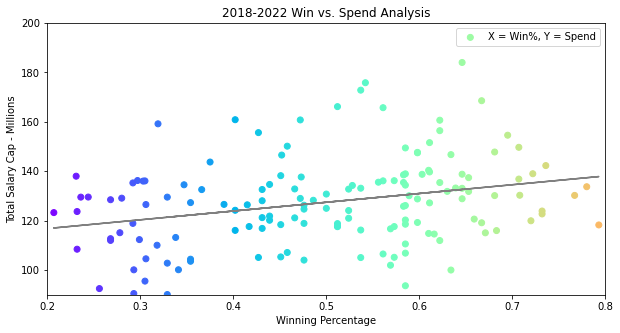

In [37]:
# create chart to show correlation of total spend and winning percentage

# create color scale
cmap = plt.cm.rainbow
norm = plt_col.Normalize(vmin=.2,vmax=1)

# create figure and scatterplot
plt.figure(figsize=(10, 5))
plt.scatter(nba_cap_df['WIN%'],nba_cap_df['TOTAL_CAP_MILLIONS'], color=cmap(norm(nba_cap_df['WIN%'].values)))
            #linewidths = 2,
            #marker ="s",
            #edgecolor ="green",
            #s = 100)
plt.xlim(.2,.8)
plt.ylim(90,200)
plt.xlabel("Winning Percentage")
plt.ylabel("Total Salary Cap - Millions")
plt.legend(["X = Win%, Y = Spend"])
plt.title("2018-2022 Win vs. Spend Analysis")

# add regression line
m, b = np.polyfit(nba_cap_df['WIN%'],nba_cap_df['TOTAL_CAP_MILLIONS'],1)
plt.plot(nba_cap_df['WIN%'], m*nba_cap_df['WIN%']+b, color='grey')

plt.show()

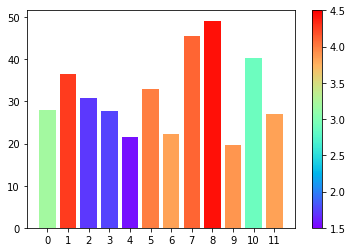

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import NBAapi as nba
from scipy import misc
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.gridspec as gridspec
from PIL import Image
import StringIO
from cairosvg import svg2png

%matplotlib inline

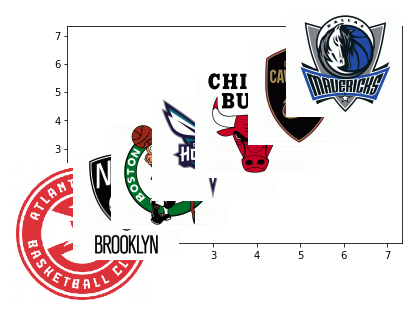

In [17]:
def getImage(path,zoom=1):
    return OffsetImage(plt.imread(path),zoom=zoom)

paths = [
    'ATL.png',
    'BKN.png',
    'BOS.png',
    'CHA.png',
    'CHI.png',
    'CLE.png',
    'DAL.png',
]
    #'DEN.png',
    #'DET.png',
    #'GSW.png',
    #'HOU.png',
    #'IND.png',
    #'LAC.png',
    #'LAL.png',
    #'MEM.png',
    #'MIA.png',
    #'MIL.png',
    #'MIN.png',
    #'NOP.png',
    #'NYK.png',
    #'OKC.png',
    #'ORL.png',
    #'PHI.png',
    #'PHX.png',
    #'POR.png',
    #'SAC.png',
    #'SAS.png',
    #'TOR.png',
    #'UTA.png',
    #'WAS.png',

x = [0,1,2,3,4,5,6,7]
y = [0,1,2,3,4,5,6,7]

fig,ax = plt.subplots()
ax.scatter(x,y)

for x0,y0, path in zip(x,y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)